In [2]:
import pandas as pd
import numpy as np

In [272]:
churn_data=pd.read_csv('C:/Users/Bharat Sakarwal/Downloads/UpGrad/churn_data.csv')

In [938]:
churn_data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No


In [944]:
churn_data[2:4]    #give all data for rows 2 and 3
churn_data.iloc[2:5,:2]

,customerID,tenure
2,3668-QPYBK,2
3,7795-CFOCW,45
4,9237-HQITU,2


In [274]:
customer_data=pd.read_csv('C:/Users/Bharat Sakarwal/Downloads/UpGrad/customer_data.csv')

In [275]:
customer_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [276]:
internet_data=pd.read_csv('C:/Users/Bharat Sakarwal/Downloads/UpGrad/internet_data.csv')

In [277]:
internet_data.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [41]:
customer_data['customerID'].dtype  # to find data type of a columns

dtype('O')

In [55]:
churn_data['customerID']=churn_data['customerID'].astype(str)
customer_data['customerID']=customer_data['customerID'].astype(str)

In [278]:
churn_customer=pd.merge(churn_data,customer_data,on='customerID',how='outer')

In [279]:
churn_customer.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
dtype: int64

In [280]:
churn_customer.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No


In [281]:
final_dataset=pd.merge(churn_customer,internet_data,on='customerID',how='inner')

In [282]:
final_dataset.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [283]:
pd.set_option('display.max_colwidth',None) # display all columns content
pd.set_option('display.max_columns',None)
final_dataset.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No


In [91]:
g=final_dataset.groupby('customerID')

In [251]:
final_dataset[['PhoneService','Contract']].apply(lambda x:x.unique())

PhoneService                               [No, Yes]
Contract        [Month-to-month, One year, Two year]
dtype: object

In [95]:
g.describe()

tenure                                         MonthlyCharges  \
            count  mean std   min   25%   50%   75%   max          count   
customerID                                                                 
0002-ORFBO    1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0            1.0   
0003-MKNFE    1.0   9.0 NaN   9.0   9.0   9.0   9.0   9.0            1.0   
0004-TLHLJ    1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0            1.0   
0011-IGKFF    1.0  13.0 NaN  13.0  13.0  13.0  13.0  13.0            1.0   
0013-EXCHZ    1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0            1.0   
...           ...   ...  ..   ...   ...   ...   ...   ...            ...   
9987-LUTYD    1.0  13.0 NaN  13.0  13.0  13.0  13.0  13.0            1.0   
9992-RRAMN    1.0  22.0 NaN  22.0  22.0  22.0  22.0  22.0            1.0   
9992-UJOEL    1.0   2.0 NaN   2.0   2.0   2.0   2.0   2.0            1.0   
9993-LHIEB    1.0  67.0 NaN  67.0  67.0  67.0  67.0  67.0            1.0   
9995-HOTOH    1.0  63.0 NaN  63.0  63.0  63.0  63.0  63.0            1.0   

                                                         TotalCharges  \
             mean std    min    25%    50%    75%    max        count   
customerID                                                              
0002-ORFBO  65.60 NaN  65.60  65.60  65.60  65.60  65.60          1.0   
0003-MKNFE  59.90 NaN  59.90  59.90  59.90  59.90  59.90          1.0   
0004-TLHLJ  73.90 NaN  73.90  73.90  73.90  73.90  73.90          1.0   
0011-IGKFF  98.00 NaN  98.00  98.00  98.00  98.00  98.00          1.0   
0013-EXCHZ  83.90 NaN  83.90  83.90  83.90  83.90  83.90          1.0   
...           ...  ..    ...    ...    ...    ...    ...          ...   
9987-LUTYD  55.15 NaN  55.15  55.15  55.15  55.15  55.15          1.0   
9992-RRAMN  85.10 NaN  85.10  85.10  85.10  85.10  85.10          1.0   
9992-UJOEL  50.30 NaN  50.30  50.30  50.30  50.30  50.30          1.0   
9993-LHIEB  67.85 NaN  67.85  67.85  67.85  67.85  67.85          1.0   
9995-HOTOH  59.00 NaN  59.00  59.00  59.00  59.00  59.00          1.0   

                                                                      \
               mean std      min      25%      50%      75%      max   
customerID                                                             
0002-ORFBO   593.30 NaN   593.30   593.30   593.30   593.30   593.30   
0003-MKNFE   542.40 NaN   542.40   542.40   542.40   542.40   542.40   
0004-TLHLJ   280.85 NaN   280.85   280.85   280.85   280.85   280.85   
0011-IGKFF  1237.85 NaN  1237.85  1237.85  1237.85  1237.85  1237.85   
0013-EXCHZ   267.40 NaN   267.40   267.40   267.40   267.40   267.40   
...             ...  ..      ...      ...      ...      ...      ...   
9987-LUTYD   742.90 NaN   742.90   742.90   742.90   742.90   742.90   
9992-RRAMN  1873.70 NaN  1873.70  1873.70  1873.70  1873.70  1873.70   
9992-UJOEL    92.75 NaN    92.75    92.75    92.75    92.75    92.75   
9993-LHIEB  4627.65 NaN  4627.65  4627.65  4627.65  4627.65  4627.65   
9995-HOTOH  3707.60 NaN  3707.60  3707.60  3707.60  3707.60  3707.60   

           SeniorCitizen                                    
                   count mean std  min  25%  50%  75%  max  
customerID                                                  
0002-ORFBO           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
0003-MKNFE           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
0004-TLHLJ           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
0011-IGKFF           1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
0013-EXCHZ           1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
...                  ...  ...  ..  ...  ...  ...  ...  ...  
9987-LUTYD           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
9992-RRAMN           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
9992-UJOEL           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
9993-LHIEB           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  
9995-HOTOH           1.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  

[7043 rows x 32 columns]

In [96]:
final_dataset.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [165]:
def binary_map(x):
    x=str(x)
    if x=='Yes':
        return 1
    elif x=='No':
        return 0

In [143]:
#a,b=10,2
#print("a is {} and b is {:.2f}".format(a,b))

a is 10 and b is 2.00


In [152]:
dummy1 = pd.get_dummies(final_dataset[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
dummy1.head(5)

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0


In [197]:
def uniq(df,cols):
    unique_col={}
    for i in cols:
        unique_col[i]=df[i].unique()
        
    print(unique_col)
   #return pd.DataFrame(unique_col)

l=final_dataset[['PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','OnlineBackup','TechSupport','StreamingTV','StreamingMovies']]

#final_dataset['MultipleLines']

The argument 'drop_first=True' is used to drop the first category in each of the categorical variables to avoid the problem of multicollinearity in the regression model. If 'drop_first=False', it will create k dummy variables for k categories of the categorical variable. False will create more subsets of variables with 0 as 1 where ever applicable

In [289]:
dummy2 = pd.get_dummies(final_dataset[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=False)
dummy2

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,1,0,0
2,1,0,0,0,0,0,1,0,1,1,0,0
3,0,1,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,0,1,0,1,1,0,0
7039,0,1,0,0,1,0,0,1,0,0,1,0
7040,1,0,0,0,0,1,0,1,0,1,0,0
7041,1,0,0,0,0,0,1,0,1,0,1,0


In [240]:
final_dataset[['MultipleLines','PaymentMethod', 'gender', 'InternetService']].apply(lambda x:x.unique())

MultipleLines                                                               [No phone service, No, Yes]
PaymentMethod      [Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)]
gender                                                                                   [Female, Male]
InternetService                                                                  [DSL, Fiber optic, No]
dtype: object

In [247]:
for col in final_dataset.columns:
    print(col, final_dataset[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet 

In [285]:
def binary_map(x):
    return x.map({"Yes":1,"No":0})

In [286]:
var=['Partner','PhoneService','PaperlessBilling','Churn','Dependents']
final_dataset[var]=final_dataset[var].apply(binary_map)

In [287]:
final_dataset[var]

,Partner,PhoneService,PaperlessBilling,Churn,Dependents
0,1,0,1,0,0
1,0,1,0,0,0
2,0,1,1,1,0
3,0,0,0,0,0
4,0,1,1,1,0
...,...,...,...,...,...
7038,1,1,1,0,1
7039,1,1,1,0,1
7040,1,0,1,0,1
7041,1,1,1,1,0


In [288]:
final_dataset.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No


For categorical variables with multiple levels, create dummy features (one-hot encoded)

PhoneService ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']

In [292]:
dummy1=pd.get_dummies(final_dataset[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

In [293]:
dummy1

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,1,0,0
7039,1,0,1,0,0,0,1,0
7040,0,0,0,1,0,0,0,0
7041,0,0,0,0,1,1,1,0


In [294]:
final_dataset=pd.concat([final_dataset,dummy1],axis=1)

In [579]:
final_dataset.count()

customerID                               7032
tenure                                   7032
PhoneService                             7032
PaperlessBilling                         7032
MonthlyCharges                           7032
TotalCharges                             7032
Churn                                    7032
SeniorCitizen                            7032
Partner                                  7032
Dependents                               7032
Contract_One year                        7032
Contract_Two year                        7032
PaymentMethod_Credit card (automatic)    7032
PaymentMethod_Electronic check           7032
PaymentMethod_Mailed check               7032
gender_Male                              7032
InternetService_Fiber optic              7032
InternetService_No                       7032
MultipleLines_No                         7032
MultipleLines_Yes                        7032
OnlineSecurity_No                        7032
OnlineSecurity_Yes                

In [308]:
ml = pd.get_dummies(final_dataset['MultipleLines'], prefix='MultipleLines')

In [309]:
ml1=ml.drop(['MultipleLines_No phone service'],axis=1)

In [ ]:
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']

In [329]:
os=pd.get_dummies(final_dataset['OnlineSecurity'],prefix='OnlineSecurity')
os1=os.drop(['OnlineSecurity_No internet service'],axis=1)
os1.head()
final_dataset=pd.concat([final_dataset,os1],axis=1)

In [346]:
ob=pd.get_dummies(final_dataset['OnlineBackup'],prefix='OnlineBackup')
ob1=ob.drop(['OnlineBackup_No internet service'],axis=1)

In [468]:
ob1.value_counts()

OnlineBackup_No  OnlineBackup_Yes
1                0                   3088
0                1                   2429
                 0                   1526
dtype: int64

In [332]:
dp=pd.get_dummies(final_dataset['DeviceProtection'],prefix='DeviceProtection')
dp1=dp.drop(['DeviceProtection_No internet service'],axis=1)
dp1.head()

,DeviceProtection_No,DeviceProtection_Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [338]:
ts=pd.get_dummies(final_dataset['TechSupport'],prefix='TechSupport')
ts1=ts.drop(['TechSupport_No internet service'],axis=1)

In [342]:
sm=pd.get_dummies(final_dataset['StreamingMovies'],prefix='StreamingMovies')
sm1=sm.drop(['StreamingMovies_No internet service'],axis=1)
sm1

,StreamingMovies_No,StreamingMovies_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,1,0


In [343]:
st=pd.get_dummies(final_dataset['StreamingTV'],prefix='StreamingTV')
st1=st.drop(['StreamingTV_No internet service'],axis=1)

In [347]:
#final_dataset=pd.concat([final_dataset,ml1],axis=1)
final_dataset=pd.concat([final_dataset,ob1,dp1,ts1,sm1,st1],axis=1)

In [351]:
final_dataset.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'StreamingTV_No', 'StreamingTV_Yes'],
      dtype='object')

In [353]:
#final_dataset=final_dataset.drop(['MultipleLines'],axis=1)
final_dataset=final_dataset.drop(['Contract','PaymentMethod','gender','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)

In [355]:
final_dataset.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [461]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [358]:
final_dataset['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [374]:
summary=final_dataset[['MonthlyCharges','TotalCharges']].describe(percentiles=[0.25,0.5,0.75,0.9])
summary

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
90%,102.600000,5976.640000
max,118.750000,8684.800000


In [410]:
summary=pd.DataFrame(final_dataset[['MonthlyCharges','TotalCharges']].describe())

In [456]:
IQR_L_MC=summary.loc['25%','MonthlyCharges']
IQR_H_MC=summary.loc['75%','MonthlyCharges']
IQR_MC=IQR_H_MC-IQR_L_MC
print("Upper range is {0} and lower range is {1}".format((1.5*IQR_MC+IQR_H_MC),(IQR_L_MC-(IQR_MC*1.5))))

Upper range is 171.375 and lower range is -46.02499999999999


In [460]:
IQR_L_TC=summary.loc['25%','TotalCharges']
IQR_H_TC=summary.loc['75%','TotalCharges']
IQR_TC=IQR_H_TC-IQR_L_TC
print("Upper range is {0} and lower range is {1}".format((1.5*IQR_TC+IQR_H_TC),(IQR_L_TC-(IQR_TC*1.5))))

Upper range is 8884.66875 and lower range is -4688.481250000001


In [414]:
IQR_L_TC=summary.loc['25%','TotalCharges']
IQR_H_TC=summary.loc['75%','TotalCharges']

In [459]:
final_dataset['MonthlyCharges'][final_dataset['MonthlyCharges']<(20)]
#q=pd.DataFrame(final_dataset['MonthlyCharges'][final_dataset['MonthlyCharges']<(IQR_L_MC)])
#q

11      18.95
21      19.80
88      19.95
101     19.45
109     19.40
        ...  
6951    19.90
6954    19.80
6958    19.75
7005    19.30
7020    19.20
Name: MonthlyCharges, Length: 613, dtype: float64

In [434]:
dum=final_dataset.drop(['customerID'],axis=1)

In [439]:
dum

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
7039,72,1,1,103.20,7362.90,0,0,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
7040,11,0,1,29.60,346.45,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
7041,4,1,1,74.40,306.60,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [438]:
len(dum)

7043

In [451]:
lower_range=[]                                       #optional code for learning
for i in range(0,len(final_dataset)):
    if dum.loc[i,'MonthlyCharges']>10:
        lower_range.append(dum.loc[i,'MonthlyCharges'])
lower_range=pd.DataFrame(lower_range)

In [475]:
tele=final_dataset

In [474]:
final_dataset.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [481]:
tele.dropna(inplace=True)

In [482]:
tele.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [580]:
tele

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [1]:
from sklearn.model_selection import train_test_split

In [875]:
x=tele.drop(['customerID','Churn'],axis=1)

In [876]:
y=tele['Churn']
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [877]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [878]:
X_train.count()

tenure                                   4922
PhoneService                             4922
PaperlessBilling                         4922
MonthlyCharges                           4922
TotalCharges                             4922
SeniorCitizen                            4922
Partner                                  4922
Dependents                               4922
Contract_One year                        4922
Contract_Two year                        4922
PaymentMethod_Credit card (automatic)    4922
PaymentMethod_Electronic check           4922
PaymentMethod_Mailed check               4922
gender_Male                              4922
InternetService_Fiber optic              4922
InternetService_No                       4922
MultipleLines_No                         4922
MultipleLines_Yes                        4922
OnlineSecurity_No                        4922
OnlineSecurity_Yes                       4922
OnlineBackup_No                          4922
OnlineBackup_Yes                  

This code is splitting a dataset into a training set and a testing set for machine learning purposes.
    X is the dataset containing all the features that will be used to train the model, and y is the corresponding target variable.
    train_test_split is a function from the scikit-learn library that randomly splits the dataset into two subsets: one for training and one for testing.
    The train_size and test_size arguments specify the proportion of the dataset that should be used for training and testing, respectively. In this case, 70% of the data will be used for training and 30% for testing.
    random_state is a parameter that ensures that the data is split in the same way every time the code is run.
After this code is executed, the following variables will be created:
    X_train contains the training set of features
    X_test contains the testing set of features
    y_train contains the target variable corresponding to the training set
    y_test contains the target variable corresponding to the testing set

These variables can then be used to train and test a machine learning model.
Free Research Preview. ChatGPT may produce inaccurate information about people, places, or facts. ChatGPT May 3 Version

In machine learning, feature scaling is a technique used to standardize the range of independent variables or 
features of data. Standardization involves rescaling data so that it has a mean of 0 and a standard deviation of 1. 
The purpose of feature scaling is to ensure that the model can learn effectively and efficiently from the data by giving 
equal weightage to all the features.
Standardization is a common way to scale features in logistic regression. 
This involves subtracting the mean of the feature and dividing by its standard deviation.
This transforms the features to have a mean of 0 and a standard deviation of 1, 
which helps to ensure that all features are on the same scale. Standardization is important for logistic regression 
because it helps to ensure that the coefficients associated with each feature are comparable. 
This makes it easier to interpret the model and identify which features are most important for the outcome being predicted.

For example, let’s say that for a particular customer, tenure = 72. After standardising, the value of the scaled tenure becomes:


72
−
32.4
24.6
=
1.61

 

This is because for the variable tenure, mean(
μ
) = 32.4 and standard deviation(
σ
) = 24.6.

In [493]:
from sklearn.preprocessing import StandardScaler

In [879]:
scaler=StandardScaler()

In [880]:
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [881]:
X_train.count()

tenure                                   4922
PhoneService                             4922
PaperlessBilling                         4922
MonthlyCharges                           4922
TotalCharges                             4922
SeniorCitizen                            4922
Partner                                  4922
Dependents                               4922
Contract_One year                        4922
Contract_Two year                        4922
PaymentMethod_Credit card (automatic)    4922
PaymentMethod_Electronic check           4922
PaymentMethod_Mailed check               4922
gender_Male                              4922
InternetService_Fiber optic              4922
InternetService_No                       4922
MultipleLines_No                         4922
MultipleLines_Yes                        4922
OnlineSecurity_No                        4922
OnlineSecurity_Yes                       4922
OnlineBackup_No                          4922
OnlineBackup_Yes                  

In [592]:
#tele['Churn']['Churn'==1].value_counts()
p=tele['Churn'][tele['Churn']==1].value_counts()
per=(p/len(tele))*100
print("Percentage of churn is {}".format(per))

Percentage of churn is 1    26.578498
Name: Churn, dtype: float64


In [ ]:
tele['Churn'].sum()/len(tele)*100

In [882]:
import seaborn as sns
import matplotlib.pyplot as plt

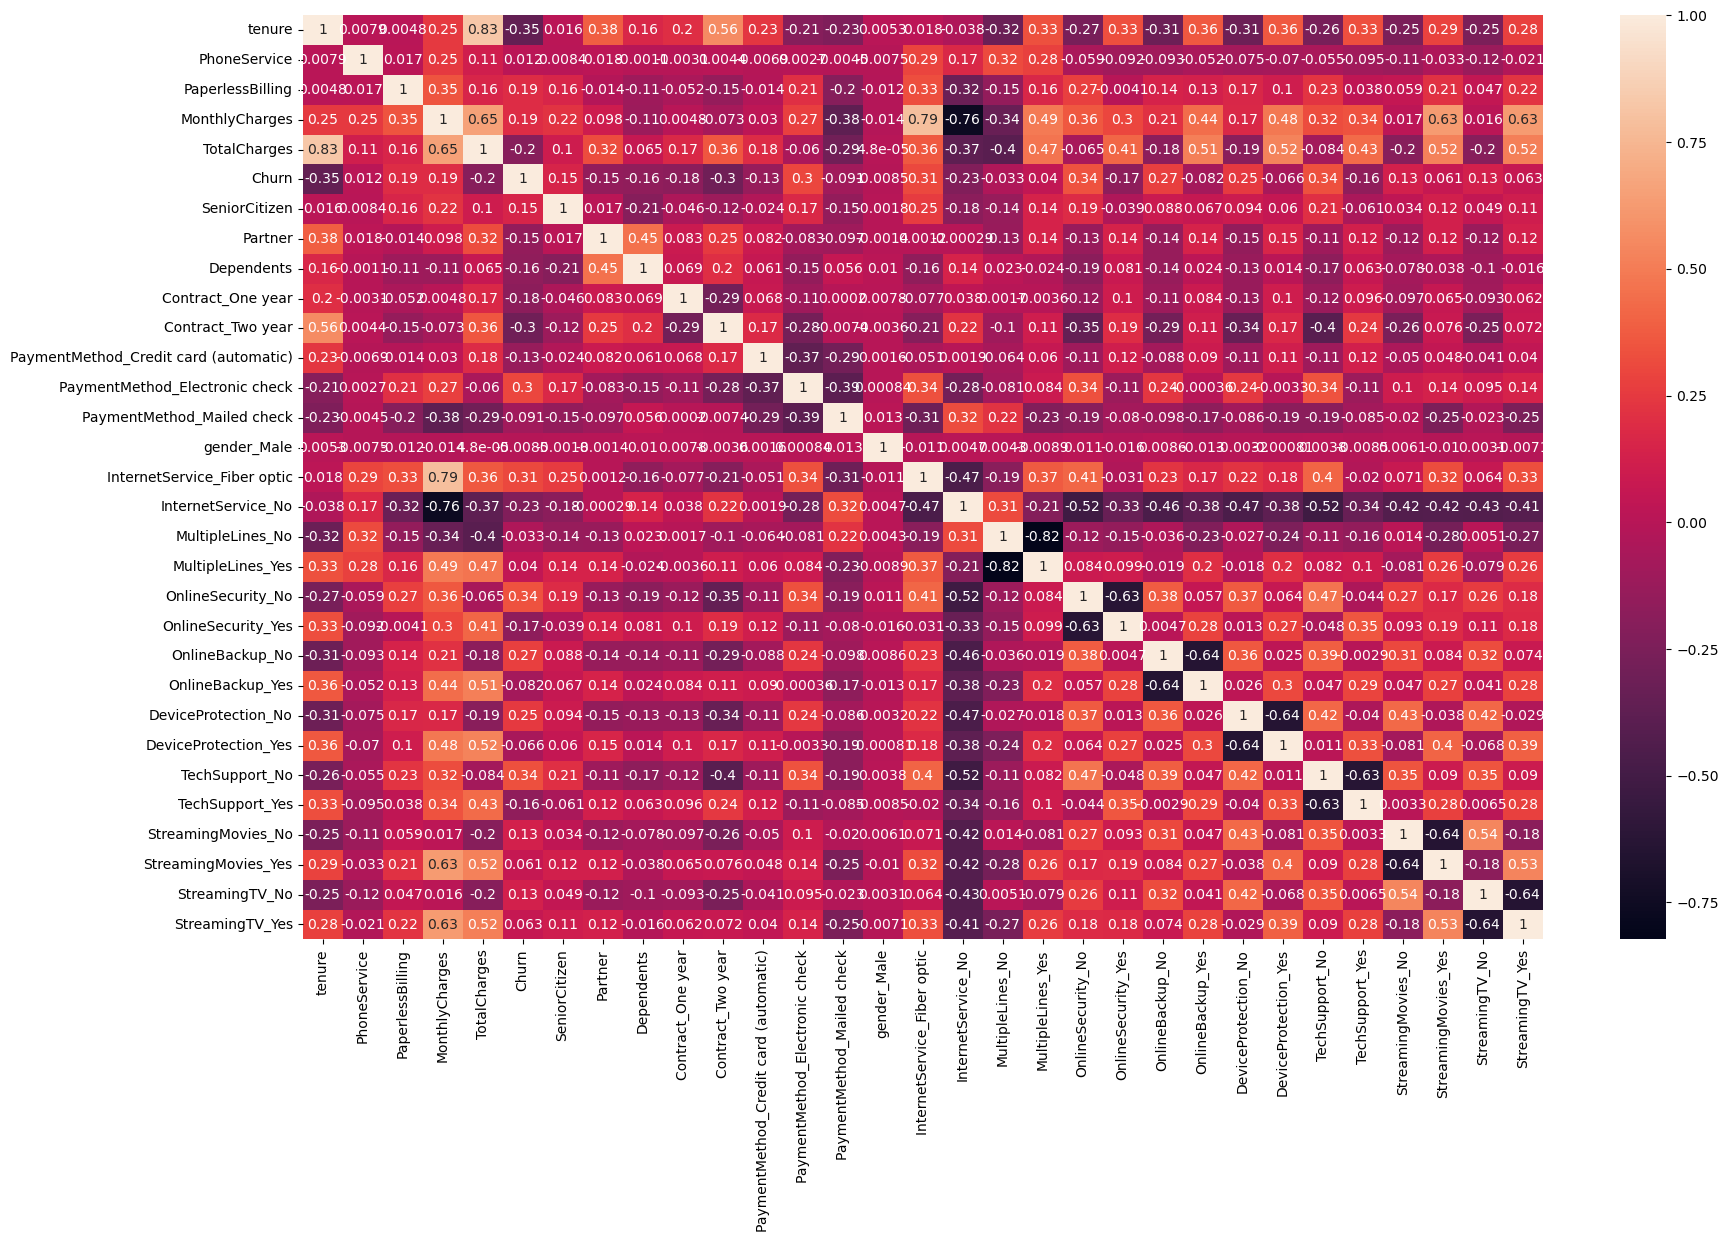

In [547]:
plt.figure(figsize=(20,12))
c=tele.corr()
sns.heatmap(c,annot=True)
plt.show()

In [539]:
#sns.pairplot(tele)  # took too much time to run

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C5437B41F0> (for post_execute):


KeyboardInterrupt: 

In [883]:
tele.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'StreamingTV_No', 'StreamingTV_Yes'],
      dtype='object')

In [884]:
X_train=X_train.drop(['StreamingTV_No','StreamingMovies_No','TechSupport_No','DeviceProtection_No','OnlineBackup_No','OnlineSecurity_No','MultipleLines_No'],axis=1)

In [885]:
X_test=X_test.drop(['StreamingTV_No','StreamingMovies_No','TechSupport_No','DeviceProtection_No','OnlineBackup_No','OnlineSecurity_No','MultipleLines_No'],axis=1)

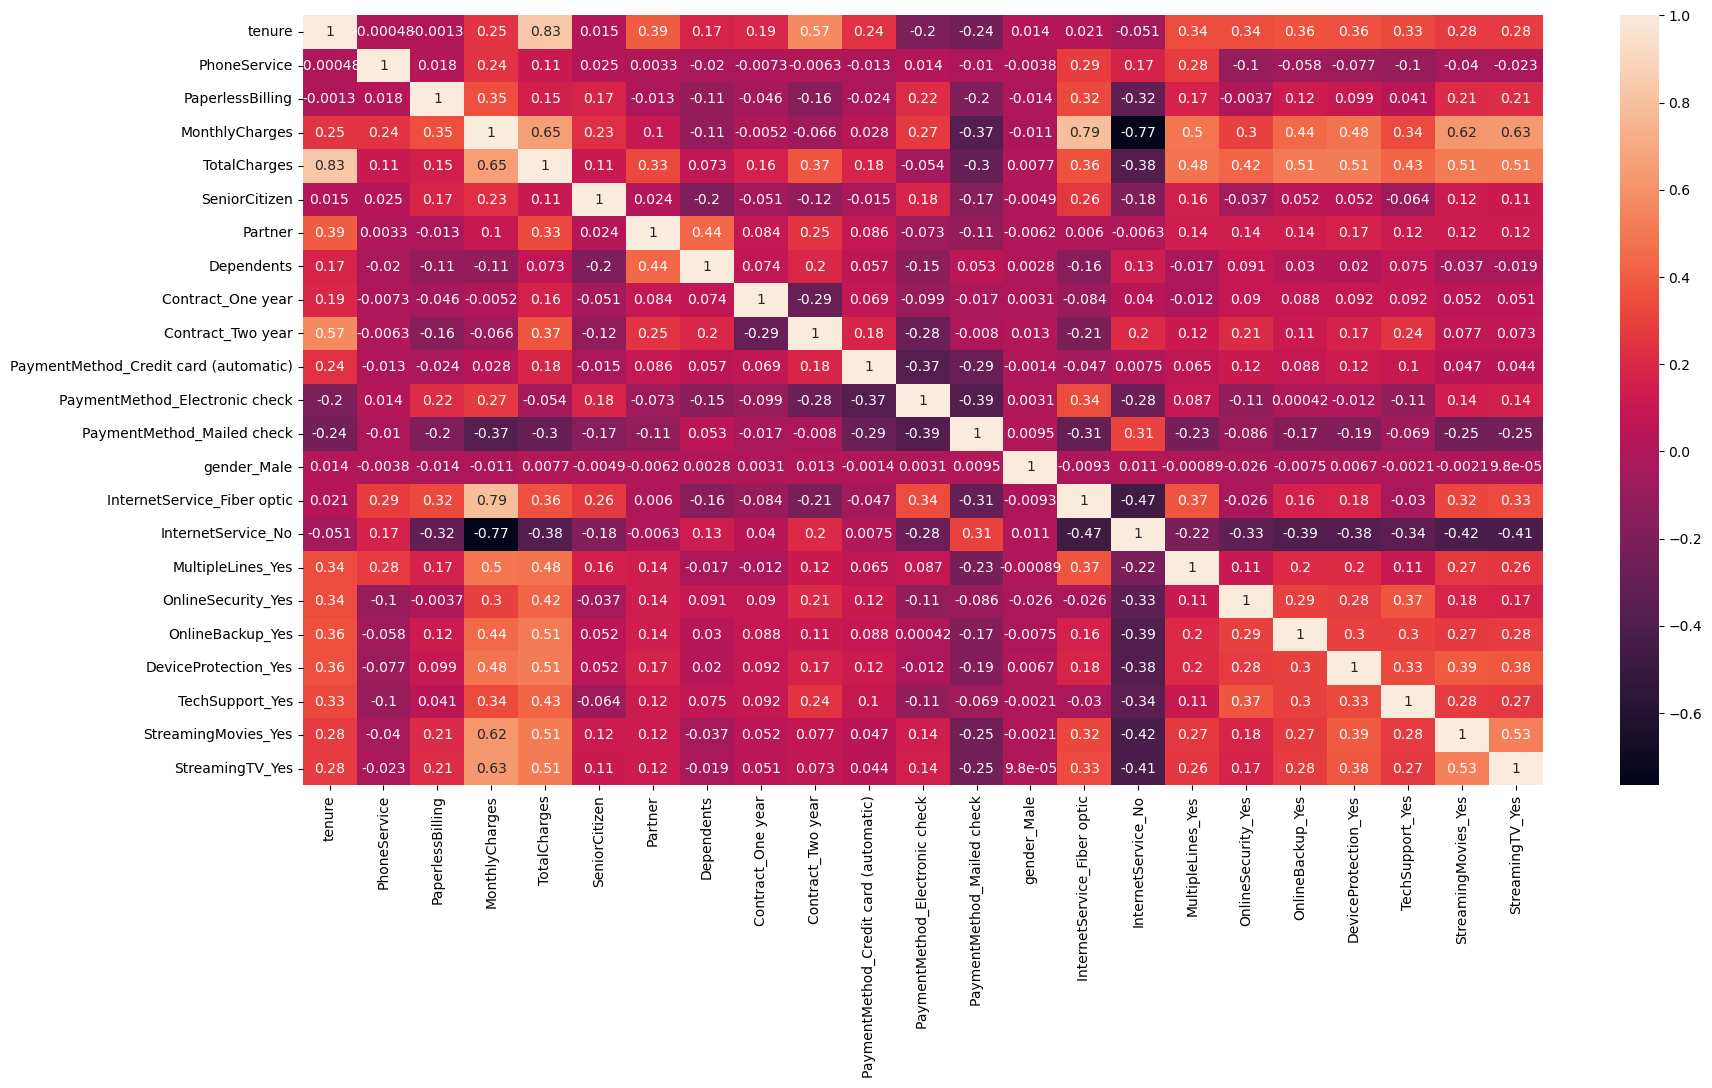

In [596]:
plt.figure(figsize=(20,10))
c=X_train.corr()   #c=X_train.corr()
sns.heatmap(c,annot=True)
plt.show()

In [571]:
import statsmodels.api as sm

In [886]:
lgr1=sm.GLM(Y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [887]:
lgr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 14 May 2023   Deviance:                       4009.4
Time:                        14:28:09   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
=========================================================================================================
"""

In [869]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()


In [870]:
from sklearn.feature_selection import RFE

In [888]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg

LogisticRegression()

In [889]:
#rfe = RFE(logreg,13)
#rfe = RFE(LogReg,15) #in __init__() takes 2 positional arguments but 3 were given error
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, Y_train)

In [890]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [891]:
rfe.ranking_

array([1, 3, 1, 1, 1, 1, 7, 6, 1, 1, 1, 4, 1, 8, 1, 1, 1, 2, 5, 9, 1, 1,
       1])

In [892]:
y=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
y

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('StreamingTV_Yes', True, 1)]

In [674]:
new_l=[]
for i in range (0,len(y)):
        if (y[i][1]==True)  & (y[i][2]==1):
            print(y[i])
            new_l.append(y[i][0])
    

('tenure', True, 1)
('PaperlessBilling', True, 1)
('MonthlyCharges', True, 1)
('TotalCharges', True, 1)
('SeniorCitizen', True, 1)
('Contract_One year', True, 1)
('Contract_Two year', True, 1)
('PaymentMethod_Credit card (automatic)', True, 1)
('PaymentMethod_Mailed check', True, 1)
('InternetService_Fiber optic', True, 1)
('InternetService_No', True, 1)
('MultipleLines_Yes', True, 1)
('TechSupport_Yes', True, 1)
('StreamingMovies_Yes', True, 1)
('StreamingTV_Yes', True, 1)


In [677]:
#new_l=pd.DataFrame(new_l)
new_l

['tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_Yes',
 'TechSupport_Yes',
 'StreamingMovies_Yes',
 'StreamingTV_Yes']

In [893]:
#col = X_train.columns[rfe.support_]
col=X_train.columns[rfe.support_]
X_train.columns
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [894]:
X_train.columns[~rfe.support_]   #columns which needs to be dropped and based on RFE 

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

next based on these columns run GLM model again

In [688]:
import statsmodels.api as sm

In [692]:
X_train_sm=sm.add_constant(X_train[col])
lgr1=sm.GLM(Y_train,(X_train_sm),family=sm.families.Binomial())

In [703]:
result=lgr1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sat, 13 May 2023   Deviance:                       4022.2
Time:                        23:24:10   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
=========================================================================================================
"""

In [750]:
y_predict=result.predict(X_train_sm)

In [751]:
y_predict=pd.DataFrame(y_predict)
y_predict[:10]

,0
879,0.192642
5790,0.275624
6498,0.599507
880,0.513571
2784,0.648233
3874,0.414846
5387,0.431184
6623,0.801788
4465,0.228194
5364,0.504575


In [ ]:
X_train_sm=sm.add_constant(X_train[col])
y_predict=result.predict(X_train_sm)        # combined cells for reiteration
y_predict=pd.DataFrame(y_predict)
y_predict=y_predict.values.reshape(-1)
y_predicted_final=pd.DataFrame({'Churn_values':Y_train.values,'Predicted_Churn_Prob':y_predict})
y_predicted_final['CustomerId']=Y_train.index
y_predicted_final['Predicted_Churn_Values']=y_predicted_final['Predicted_Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
metrics.accuracy_score(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])

In [752]:
y_predict=y_predict.values.reshape(-1)


In [753]:
y_predicted_final=pd.DataFrame({'Churn_values':Y_train.values,'Predicted_Churn_Prob':y_predict})

In [762]:
y_predicted_final['CustomerId']=Y_train.index

In [774]:
y_predicted_final

,Churn_values,Predicted_Churn_Prob,Predicted_Churn_Values,CustomerId
0,0,0.192642,0,879
1,0,0.275624,0,5790
2,1,0.599507,1,6498
3,1,0.513571,1,880
4,1,0.648233,1,2784
...,...,...,...,...
4917,0,0.015336,0,79
4918,0,0.126458,0,3934
4919,0,0.039247,0,5964
4920,0,0.129142,0,6947


In [756]:
y_predicted_final['Predicted_Churn_Values']=y_predicted_final['Predicted_Churn_Prob'].map(lambda x:1 if x>0.5 else 0)

In [779]:
y_predicted_final[y_predicted_final['Predicted_Churn_Prob']>0.5].count()

Churn_values              1073
Predicted_Churn_Prob      1073
Predicted_Churn_Values    1073
CustomerId                1073
dtype: int64

In [ ]:
y_predicted_final

In [766]:
from sklearn import metrics

In [780]:
labels_col=['Predicted Not Churn','predicted Churn']
labels_row=['Actual Not Churn','Actual Churn']

In [784]:
cm=metrics.confusion_matrix(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])
cm

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [785]:
labels_col=['Predicted Not Churn','predicted Churn']
labels_row=['Actual Not Churn','Actual Churn']
cm=metrics.confusion_matrix(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])
cm_df=pd.DataFrame(cm,columns=labels_col,index=labels_row)
cm_df

,Predicted Not Churn,predicted Churn
Actual Not Churn,3275,360
Actual Churn,574,713


In [786]:
metrics.accuracy_score(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])

0.8102397399431126

In [787]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [895]:
X_train[col].shape

(4922, 15)

In [907]:
vif=pd.DataFrame()             # Reiterating VIF after dropping values
vif['Features']=col
vif['VIF']=[variance_inflation_factor((X_train[col].values),i) for i in range (0,X_train[col].shape[1])]
vif['VIF']=vif['VIF'].round(2)
#vif= vif.sort_values(by='VIF',ascending=False)
vif= vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
11,StreamingMovies_Yes,2.54
12,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [904]:
#col=col.drop('MonthlyCharges')
#col=col.drop('tenure')   # previously dropped Monthly Charges, Total Charges, Tenure
col=col.drop('TotalCharges')

In [851]:
type(col)

pandas.core.indexes.base.Index

In [908]:
X_train_sm=sm.add_constant(X_train[col])
lgr1=sm.GLM(Y_train,(X_train_sm),family=sm.families.Binomial())
result=lgr1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sun, 14 May 2023   Deviance:                       4051.9
Time:                        14:34:54   Pearson chi2:                 5.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2782
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
=========================================================================================================
"""

In [906]:
X_train_sm=sm.add_constant(X_train[col])
y_predict=result.predict(X_train_sm)        # combined cells for reiteration
y_predict=pd.DataFrame(y_predict)
y_predict=y_predict.values.reshape(-1)
y_predicted_final=pd.DataFrame({'Churn_values':Y_train.values,'Predicted_Churn_Prob':y_predict})
y_predicted_final['CustomerId']=Y_train.index
y_predicted_final['Predicted_Churn_Values']=y_predicted_final['Predicted_Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
metrics.accuracy_score(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])  #gives accuracy of model which isnt justified at times

0.8061763510767981

In [947]:
labels_col=['Predicted Not Churn','predicted Churn']
labels_row=['Actual Not Churn','Actual Churn']
cm=metrics.confusion_matrix(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])
cm_df=pd.DataFrame(cm,columns=labels_col,index=labels_row)
cm_df

,Predicted Not Churn,predicted Churn
Actual Not Churn,3278,357
Actual Churn,597,690


In [953]:
sum(sum(cm_df))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [927]:
TP=cm[1,1]   #true positive
TN=cm[0,0]   #true negative
FP=cm[0,1]   #False Positive
FN=cm[1,0]   #False Negative

In [930]:
sensitivity=TP/float(TP+FN)    # for postivie cases
sensitivity

0.5361305361305362

In [931]:
specificity=TN / float(TN+FP)  # for negative cases

0.9017881705639614

In [933]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09821182943603851


In [935]:
# positive predictive value    how many times you were correct predicting postive values out of all positive predictions
print (TP / float(TP+FP))

0.6590257879656161


In [945]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8459354838709677


ROC Curve

In [946]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values']

In [949]:
fpr, tpr, thresholds = metrics.roc_curve( y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Prob'], drop_intermediate = False )

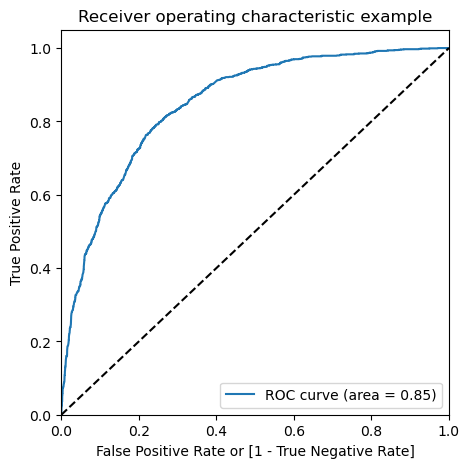

In [951]:
draw_roc(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Prob'])

In [1014]:
y_predicted_final.head()

,Churn_values,Predicted_Churn_Prob,CustomerId,Predicted_Churn_Values,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [996]:
 y_predicted_final[0.9]=y_predicted_final['Predicted_Churn_Prob'].map(lambda x:1 if x>0.9 else 0)

In [1001]:
y_predicted_final=y_predicted_final.drop([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1)

In [1012]:
num=[float(i/10) for i in range(0,10)]
y_predicted_final[y_predicted_final['Predicted_Churn_Prob']>0.8]

,Churn_values,Predicted_Churn_Prob,CustomerId,Predicted_Churn_Values
110,1,0.851566,5783,1
257,1,0.838736,905,1
370,1,0.847337,585,1
445,1,0.831045,2741,1
523,1,0.817906,6862,1
527,1,0.831045,3467,1
715,1,0.843872,4826,1
740,1,0.828056,6179,1
854,1,0.863091,301,1
975,1,0.867574,5933,1


In [1013]:
num=[float(i/10) for i in range(0,10)]

for j in num:
    y_predicted_final[j]=y_predicted_final['Predicted_Churn_Prob'].map(lambda x:1 if x>j else 0)


In [1015]:
'''
num
Accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity= TP/(TP+FN)
specificity= TN/(TN+FP)
'''

cm=metrics.confusion_matrix(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])
print(cm)
cm[1,1]  # TP
cm[0,0]  #TN
cm[0,1]  # FP
cm[1,0]  #FN



[[3278  357]
 [ 597  690]]


597

In [1026]:
from sklearn.metrics import confusion_matrix
perf=pd.DataFrame(columns=['Prob','Accuracy','Sensitivity','Specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for i in num:
    cm=metrics.confusion_matrix(y_predicted_final['Churn_values'],y_predicted_final[i])
    TP=cm[1,1]  # TP
    TN=cm[0,0]  #TN
    FP=cm[0,1]  # FP
    FN=cm[1,0]  #FN
    perf.loc[i,'Prob']=i
    perf.loc[i,'Accuracy']=(TP+TN)/(TP+TN+FP+FN)
    perf.loc[i,'Sensitivity']=(TP)/(TP+FN)
    perf.loc[i,'Specificity']= (TN)/(TN+FP)
perf

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.261479,1.0,0.0
0.1,0.1,0.614994,0.943279,0.498762
0.2,0.2,0.721861,0.846154,0.677854
0.3,0.3,0.770012,0.776224,0.767813
0.4,0.4,0.790532,0.636364,0.845117
0.5,0.5,0.806176,0.536131,0.901788
0.6,0.6,0.79805,0.38073,0.945805
0.7,0.7,0.77631,0.196581,0.981568
0.8,0.8,0.747867,0.041181,0.998074


C:\Users\Bharat Sakarwal\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


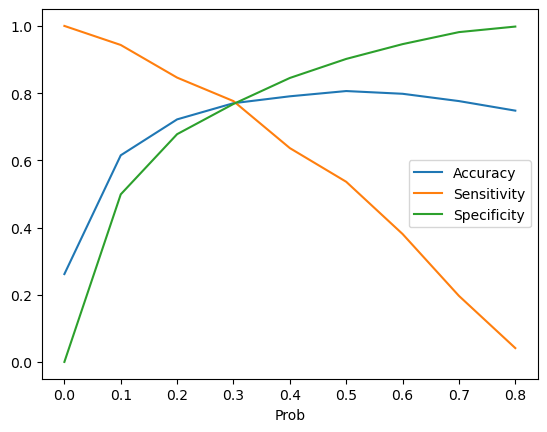

In [1032]:
perf.plot.line(x='Prob',y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [1033]:
#running model at 0.3
y_predicted_final['Predicted_Churn_Values']=y_predicted_final['Predicted_Churn_Prob'].map(lambda x:1 if x>0.3 else 0)
metrics.accuracy_score(y_predicted_final['Churn_values'],y_predicted_final['Predicted_Churn_Values'])  #gives ac

0.7700121901665989

Presicion and Recall
Sensitivity and specificity 

above 2 evalutation approach based on business need and interpretations

now test your model on test set

In [1044]:
X_test.count


<bound method DataFrame.count of         tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
942  -0.347623             1                 1        0.499951     -0.128378   
3730  0.999203             1                 1        1.319685      1.600302   
1761  1.040015             1                 1       -1.342374     -0.343297   
2283 -1.286319             1                 1        0.223935     -0.979170   
1872  0.346196             1                 0       -1.500335     -0.656086   
...        ...           ...               ...             ...           ...   
1289  1.244080             1                 0        0.132483      0.802182   
3508  1.529770             1                 1        1.623968      2.490097   
6765  1.488957             1                 1       -1.304131     -0.272833   
3598 -1.286319             1                 0       -0.615753     -0.990304   
4987  1.570583             1                 0       -1.342374     -0.247589   

      

In [ ]:
lgr3=sm.GLM(Y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
lgr3.fit().summmary()

In [1038]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [1054]:
Y_test.shape
y_predict_test.shape

(2110,)

In [1056]:
#X_test_sm=sm.add_constant(X_test[col])   # col contains necessary columns after RFE drop process
X_test_sm=sm.add_constant(X_test[col]) 
y_predict_test=result.predict(X_test_sm)   # combined cells for reiteration and result of train model needs to be passed

y_predict_test=pd.DataFrame(y_predict_test)

y_predict_test=y_predict_test.values.reshape(-1)
y_predicted_final2=pd.DataFrame({'Churn_values':Y_test.values,'Predicted_Churn_Prob':y_predict_test})
y_predicted_final2['CustomerId']=X_test.index
y_predicted_final2['Predicted_Churn_Values']=y_predicted_final2['Predicted_Churn_Prob'].map(lambda x:1 if x>0.3 else 0)
metrics.accuracy_score(y_predicted_final2['Churn_values'],y_predicted_final2['Predicted_Churn_Values'])  #gives accuracy of model which isnt justified at times

0.7407582938388626